### Questions

### Objectives
YWBAT 
- apply time series techniques to find insights on a dataset

### Outline

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Load in dataset 
df = pd.read_csv("./data/GlobalLandTemperatures_GlobalTemperatures.csv")
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
dt                                           3192 non-null object
LandAverageTemperature                       3180 non-null float64
LandAverageTemperatureUncertainty            3180 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: float64(8), object(1)
memory usage: 224.5+ KB


((3192, 9), None)

### Transform data to time series

In [4]:
df.dt = pd.to_datetime(df.dt)
df.set_index('dt', inplace=True)

### make a basic plot of each column with time


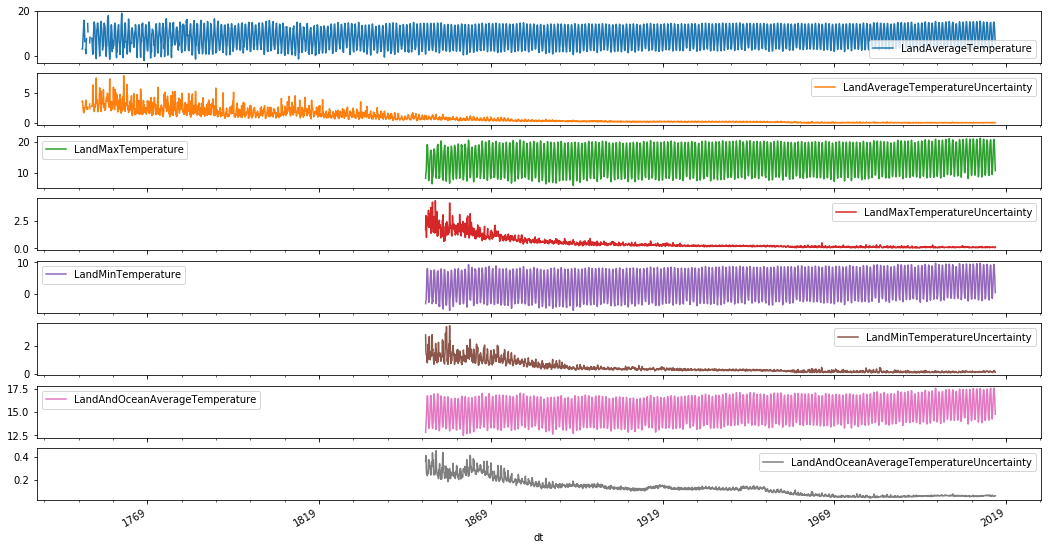

In [14]:
cols = list(df.columns)
df.plot(subplots=True, figsize=(18,10));

In [6]:
# from chat
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.dropna())
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


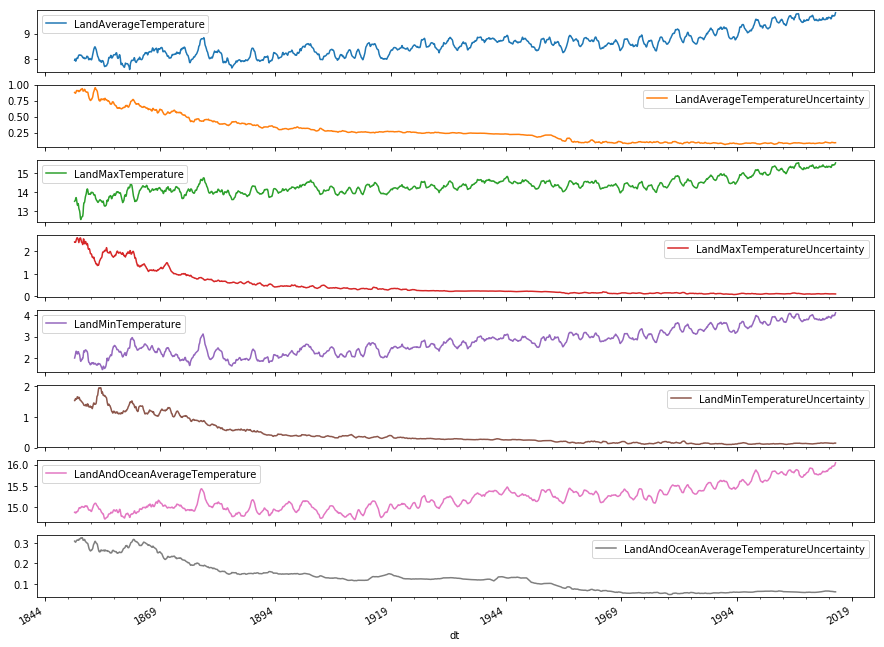

In [16]:
trend.plot(subplots=True, figsize=(15,12));

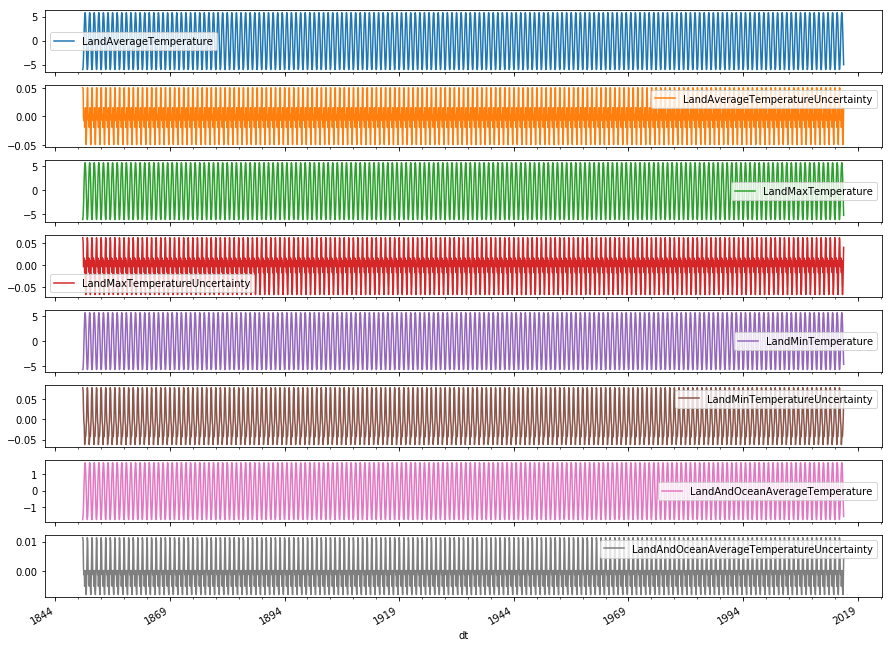

In [17]:
seasonal.plot(subplots=True, figsize=(15,12));

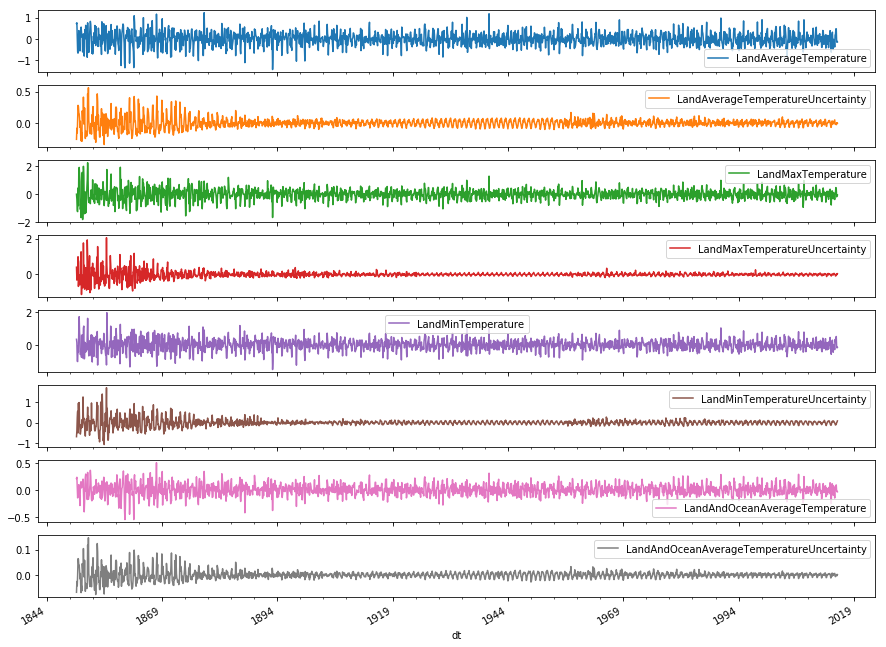

In [18]:
residual.plot(subplots=True, figsize=(15,12));

In [22]:
df.dropna(inplace=True)

In [23]:
# log transformation
log_df = np.log(df)

C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [26]:
# subtracting exponentially weighted rolling mean
exp_rolmean = log_df.ewm(halflife = 2).mean()
log_df_sub_wma = log_df - exp_rolmean

In [27]:
# differencing
log_diff = log_df_sub_wma.diff(periods=12)

In [28]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
from statsmodels.tsa.stattools import adfuller
def stationarity_check(TS, column_name, rolling_window=7):
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = rolling_window, center = False).mean()
    rolstd = TS.rolling(window = rolling_window, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS[column_name]) # change the column name as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

In [32]:
stationarity_check(log_diff['LandAverageTemperature'].dropna(), 'LandAverageTemperature', rolling_window=12)

NameError: name 'LandAverageTemperature' is not defined

In [30]:
# analysis
for col in cols:
    stationarity_check(log_diff[col].dropna(), col, rolling_window=12)

KeyError: 'LandAverageTemperature'

### what insights can you find through time series analysis?


### Assessment